In [2]:
%matplotlib inline

In [3]:
from matplotlib import pyplot as plt
import numpy as np

In [4]:
# each point is Sepal length on Cm, Sepal width on Cm & type (0.1)
# 0 for Iris-setosa & 1 for Iris-versicolor
data = [[ 5.1,  3.5,  0 ],
       [ 4.9,  3. ,  0 ],
       [ 4.7,  3.2,  0 ],
       [ 4.6,  3.1,  0 ],
       [ 5. ,  3.6,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 4.6,  3.4,  0 ],
       [ 5. ,  3.4,  0 ],
       [ 4.4,  2.9,  0 ],
       [ 4.9,  3.1,  0 ],
       [ 5.4,  3.7,  0 ],
       [ 4.8,  3.4,  0 ],
       [ 4.8,  3. ,  0 ],
       [ 4.3,  3. ,  0 ],
       [ 5.8,  4. ,  0 ],
       [ 5.7,  4.4,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 5.1,  3.5,  0 ],
       [ 5.7,  3.8,  0 ],
       [ 5.1,  3.8,  0 ],
       [ 7. ,  3.2,  1 ],
       [ 6.4,  3.2,  1 ],
       [ 6.9,  3.1,  1 ],
       [ 5.5,  2.3,  1 ],
       [ 6.5,  2.8,  1 ],
       [ 5.7,  2.8,  1 ],
       [ 6.3,  3.3,  1 ],
       [ 4.9,  2.4,  1 ],
       [ 6.6,  2.9,  1 ],
       [ 5.2,  2.7,  1 ],
       [ 5. ,  2. ,  1 ],
       [ 5.9,  3. ,  1 ],
       [ 6. ,  2.2,  1 ],
       [ 6.1,  2.9,  1 ],
       [ 5.6,  2.9,  1 ],
       [ 6.7,  3.1,  1 ],
       [ 5.6,  3. ,  1 ],
       [ 5.8,  2.7,  1 ],
       [ 6.2,  2.2,  1 ],
       [ 5.6,  2.5,  1 ],
       [ 5.9,  3.2,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.3,  2.5,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.4,  2.9,  1 ]]

mystery_flower = [ 6.6,  3]

In [5]:
def sigmoid(x) :
    return 1/(1 + np.exp(-x))

def sigmoid_p(x) :
    return sigmoid(x) * (1-sigmoid(x))

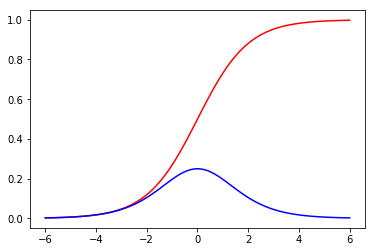

In [6]:
T = np.linspace(-6, 6, 100)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_p(T), c='b')

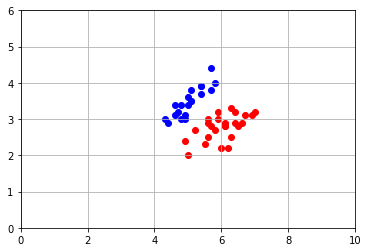

In [11]:
# scatter data
plt.axis([0, 10, 0, 6])
plt.grid()
for i in range(len(data)) :
    point = data[i]
    color = "r"
    if point[2] == 0 :
        color = "b"
    plt.scatter(point[0], point[1], c=color)

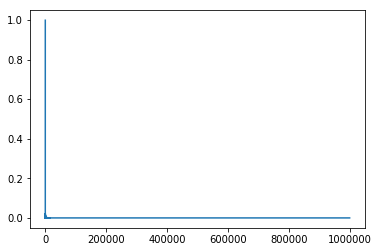

In [12]:
# training loop
learning_rate = 0.2
costs = []

# generating the weights & the bias
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

for i in range(100000000) :
    ri = np.random.randint(len(data))
    point = data[ri]
    
    z = point[0] * w1 + point[1] * w2 + b
    prediction = sigmoid(z)
    
    target = point[2]
    
    # cost function
    cost = np.square(prediction - target)
    
    #derivative of the cost function
    dcost_prediction = 2 * (prediction -target)
    dprediction_dz = sigmoid_p(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    
    # the slope of the cost function
    dcost_dz = dcost_prediction * dprediction_dz
    
    # the slope of the weights & bias
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db
    
    # Getting new weights & bias
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    
    # this is only for the graph shown below
    if i % 100 == 0 :
        cost_sum = 0
        for j in range(len(data)) :
            point = data[ri]
            
            z = point[0] * w1 + point[1] * w2 + b
            prediction = sigmoid(z)
            
            target = point[2]
            cost_sum += np.square(prediction - target)
            
        costs.append(cost_sum/len(data))

plt.plot(costs)

In [13]:
# prediction
#test data
test_data = [[ 5.4,  3.4,  0. ],
           [ 4.6,  3.6,  0. ],
           [ 5.1,  3.3,  0. ],
           [ 4.8,  3.4,  0. ],
           [ 5. ,  3. ,  0. ],
           [ 5. ,  3.4,  0. ],
           [ 5.2,  3.5,  0. ],
           [ 5.2,  3.4,  0. ],
           [ 4.7,  3.2,  0. ],
           [ 4.8,  3.1,  0. ],
           [ 5.4,  3.4,  0. ],
           [ 5.2,  4.1,  0. ],
           [ 5.5,  4.2,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 5. ,  3.2,  0. ],
           [ 5.5,  3.5,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 4.4,  3. ,  0. ],
           [ 5.1,  3.4,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 4.5,  2.3,  0. ],
           [ 4.4,  3.2,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.8,  3. ,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.6,  3.2,  0. ],
           [ 5.3,  3.7,  0. ],
           [ 5. ,  3.3,  0. ],
           [ 6.8,  2.8,  1. ],
           [ 6.7,  3. ,  1. ],
           [ 6. ,  2.9,  1. ],
           [ 5.7,  2.6,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.8,  2.7,  1. ],
           [ 6. ,  2.7,  1. ],
           [ 5.4,  3. ,  1. ],
           [ 6. ,  3.4,  1. ],
           [ 6.7,  3.1,  1. ],
           [ 6.3,  2.3,  1. ],
           [ 5.6,  3. ,  1. ],
           [ 5.5,  2.5,  1. ],
           [ 5.5,  2.6,  1. ],
           [ 6.1,  3. ,  1. ],
           [ 5.8,  2.6,  1. ],
           [ 5. ,  2.3,  1. ],
           [ 5.6,  2.7,  1. ],
           [ 5.7,  3. ,  1. ],
           [ 5.7,  2.9,  1. ],
           [ 6.2,  2.9,  1. ],
           [ 5.1,  2.5,  1. ],
           [ 5.7,  2.8,  1. ]]

for i in range(len(test_data)) :
    point = test_data[i]
    print(point)
    
    z = point[0] * w1 + point[1] * w2 + b
    prediction = sigmoid(z)
    print("prediction : {}" .format(prediction))

[5.4, 3.4, 0.0]
prediction : 0.0003732119461262876
[4.6, 3.6, 0.0]
prediction : 1.6165529365220325e-12
[5.1, 3.3, 0.0]
prediction : 3.021129787190027e-05
[4.8, 3.4, 0.0]
prediction : 1.12668940728321e-08
[5.0, 3.0, 0.0]
prediction : 0.016754201762655997
[5.0, 3.4, 0.0]
prediction : 3.618888511649216e-07
[5.2, 3.5, 0.0]
prediction : 7.890864629233378e-07
[5.2, 3.4, 0.0]
prediction : 1.1623621451677782e-05
[4.7, 3.2, 0.0]
prediction : 4.3138158005368305e-07
[4.8, 3.1, 0.0]
prediction : 3.601250126422596e-05
[5.4, 3.4, 0.0]
prediction : 0.0003732119461262876
[5.2, 4.1, 0.0]
prediction : 7.72316857328119e-14
[5.5, 4.2, 0.0]
prediction : 9.54400506930689e-13
[4.9, 3.1, 0.0]
prediction : 0.00020406375151535422
[5.0, 3.2, 0.0]
prediction : 7.85207427420422e-05
[5.5, 3.5, 0.0]
prediction : 0.00014362143923047358
[4.9, 3.1, 0.0]
prediction : 0.00020406375151535422
[4.4, 3.0, 0.0]
prediction : 5.142188396445505e-07
[5.1, 3.4, 0.0]
prediction : 2.050973470283607e-06
[5.0, 3.5, 0.0]
prediction : 2

In [27]:
z = mystery_flower[0] * w1 + mystery_flower[1] * w2 + b
prediction = sigmoid(z)
prediction

0.99999999994819522

In [28]:
# 0 for Iris-setosa and 1 for Iris-versicolor
def guess_flower(SepalLength, SepalWidth) :
    z = SepalLength * w1 + SepalWidth * w2 + b
    prediction = sigmoid(z)
    if prediction < .5:
        print('Iris-setosa')
    else:
        print('Iris-versicolor')

In [29]:
guess_flower(4.8, 3.0)

Iris-setosa


In [30]:
guess_flower(6.7, 3.0)

Iris-versicolor


In [31]:
guess_flower(5.1, 3.7)

Iris-setosa
